Utilice el lenguaje de programación Python para realizar lo siguiente:

1. En un script de python utilice el paquete sklearn.datasets para descargar el dataset Iris Plant. Este dataset tiene 150 vectores de 4 dimensiones divididos en 3 clases (Setosa, Virginica y Versicolor) 

2. Utilice el algoritmo PCA para generar dos nuevas versiones de dataset Iris3D y Iris2D. Iris3D será el resultado de reducir la dimensionalidad original de Iris Plant con las 3 primeras componentes principales de PCA e Iris2D con las 2 primeras componentes.

3. Aplique el algoritmo k-means a las 3 versiones del dataset (Iris plant original, con 4 dimensiones, Iris3D e Iris2D). Deberá usar una k=3 para formar 3 clusters en cada una de las 3 versiones del dataset. Grafique el resultado de la clusterización para Iris3D e Iris2D.

4. Imprima en consola los centros obtenidos para cada una de las 3 versiones del dataset.

5. El clasificador de mínima distancia lo agregará en la próxima clase (viernes 2 de septiembre) con ayuda del profesor. Por lo tanto, la práctica se evaluará hasta el paso 4 debido a que tienen menos tiempo para realizarla.

6. Suba su script a esta plataforma con el nombre ML_Apellidos_NUA_Prac2_irisPlant.ZIP o . RAR, recuerden enviarlo comprimido para evitar bloqueos de seguridad de la plataforma.(recuerde no utilizar caracteres especiales como acentos, ñ, ë, etc.)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import mpl_toolkits.mplot3d
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestCentroid
#!pip update scikit-learn
#!pip install scikit-learn==1.1
#from sklearn import inspection#!pip install inspection 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikit-learn==1.1 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0b1, 0.15.0b2, 0.15.0, 0.15.1, 0.15.2, 0.16b1, 0.16.0, 0.16.1, 0.17b1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19b2, 0.19.0, 0.19.1, 0.19.2, 0.20rc1, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21rc2, 0.21.0, 0.21.1, 0.21.2, 0.21.3, 0.22rc2.post1, 0.22rc3, 0.22, 0.22.1, 0.22.2, 0.22.2.post1, 0.23.0rc1, 0.23.0, 0.23.1, 0.23.2, 0.24.dev0, 0.24.0rc1, 0.24.0, 0.24.1, 0.24.2, 1.0rc1, 1.0rc2, 1.0, 1.0.1, 1.0.2)
ERROR: No matching distribution found for scikit-learn==1.1


In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay 
iris = datasets.load_iris()
X = iris.data[:, :4]  # Array like of shape 150 puntos de dim 4
y = iris.target       # Etiquetas
#n=np.size(X,1)        # Eje 1 tamaño de dim, eje 0 no. puntos 

ImportError: ignored

In [ ]:
# PRINCIPAL COMPONENT ANALYSIS
pca=PCA(n_components=4)
X_4D=pca.fit_transform(X) # Fit model with X and apply dimensionality reduction on X 

pca=PCA(n_components=3)
X_3D=pca.fit_transform(X)

pca=PCA(n_components=2)
X_2D=pca.fit_transform(X)

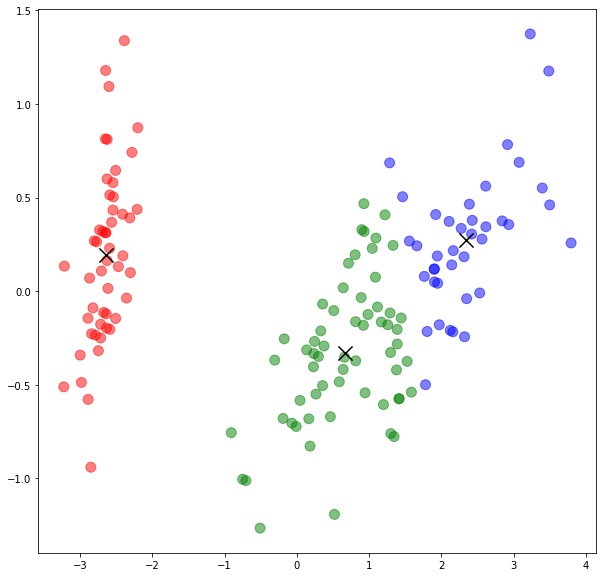

In [ ]:
kmeans_pca = KMeans(n_clusters = 3)
X4_clustered = kmeans_pca.fit_predict(X_4D)  # Compute cluster centers and predict cluster index for each sample
X3_clustered = kmeans_pca.fit_predict(X_3D)
centers3 = kmeans_pca.cluster_centers_
X2_clustered = kmeans_pca.fit_predict(X_2D)
centers2 = kmeans_pca.cluster_centers_

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'} # Cluster color assignations
label_color = [LABEL_COLOR_MAP[l] for l in X2_clustered]


plt.figure(figsize = (10,10))
plt.scatter(X_2D[:,0],X_2D[:,1],s=100., c= label_color, alpha=0.5)
plt.scatter(centers2[:,0],centers2[:,1],s=200., c= 'black',marker='x', alpha=1) 
plt.show()

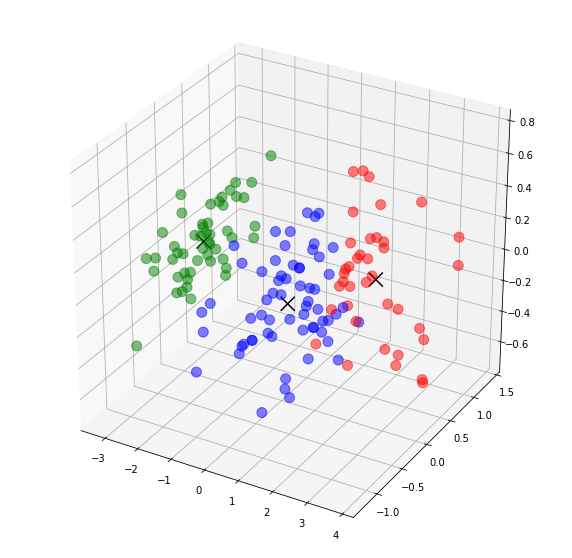

In [ ]:
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X3_clustered]


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],s=100., c= label_color, alpha=0.5) 
ax.scatter(centers3[:,0],centers3[:,1],centers3[:,2],s=200., c= 'black',marker='x', alpha=1)
plt.show()